TASK 4: SALES PREDICTION USING PYTHON

Author: Alladoum Ndoubayo

Field: Data Science

Purpose: The objective of this project is to train a machine learning model that can predicted from these measurements and accurately predicting future sales.

Bash: July


In [ ]:
# IMPORTING LIBRARY IN JUPYTER NOTEBOOK ENVIRONMENT
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')


In [ ]:
# IMPORTING DATASET
df = pd.read_csv("C:/Users/hp/Desktop/CODSOFT INTERNSHIP/advertising.xls", encoding="latin-1")

In [23]:
# check the header
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [6]:
df.shape

(200, 4)

In [7]:
df.dtypes

TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object

In [8]:
df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [9]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [10]:
df.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


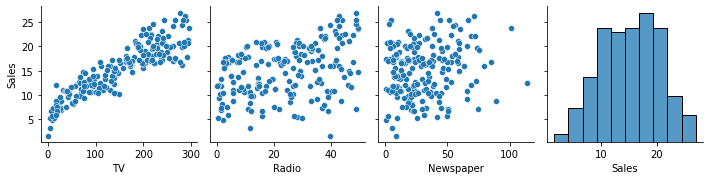

In [12]:
sns.pairplot(df, y_vars='Sales')
plt.show()

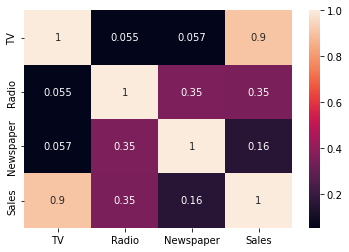

In [13]:
numeric_advertising = df.select_dtypes(include=['float', 'int'])
corr= numeric_advertising.corr()
sns.heatmap(corr, annot = True)
plt.show()

<AxesSubplot:ylabel='Frequency'>

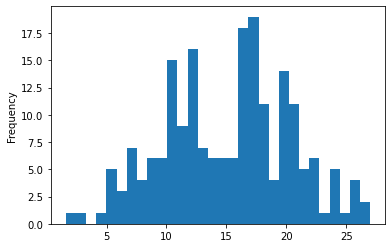

In [14]:
df["Sales"].plot.hist(bins=30)

<AxesSubplot:ylabel='Frequency'>

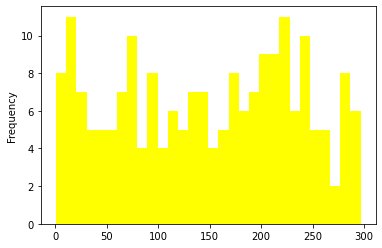

In [15]:
df["TV"].plot.hist(bins=30, color='yellow')

<AxesSubplot:ylabel='Frequency'>

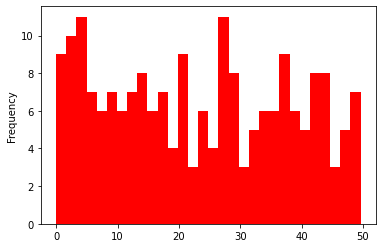

In [16]:
df["Radio"].plot.hist(bins=30, color='red')

<AxesSubplot:ylabel='Frequency'>

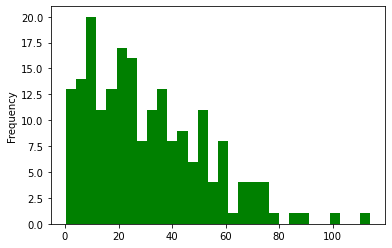

In [17]:
df["Newspaper"].plot.hist(bins=30, color='green')

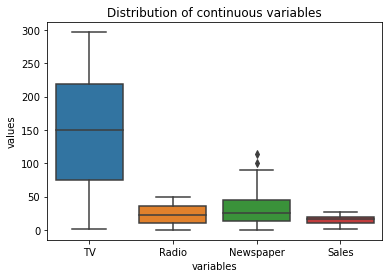

In [19]:
df_melted = pd.melt(df, value_vars=df.columns)
sns.boxplot(data=df_melted, x="variable", y="value")
plt.title('Distribution of continuous variables')
plt.xlabel('variables')
plt.ylabel('values')
plt.show()

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(df[['TV']], df[['Sales']], test_size=0.2, random_state = 42)

In [22]:
print(X_train)

        TV
79   116.0
197  177.0
38    43.1
24    62.3
122  224.0
..     ...
106   25.0
14   204.1
92   217.7
179  165.6
102  280.2

[160 rows x 1 columns]


In [25]:
print(Y_train)

     Sales
79    11.0
197   14.8
38    10.1
24     9.7
122   16.6
..     ...
106    7.2
14    19.0
92    19.4
179   17.6
102   19.8

[160 rows x 1 columns]


In [26]:
print(X_test)

        TV
95   163.3
15   195.4
30   292.9
158   11.7
128  220.3
115   75.1
69   216.8
170   50.0
174  222.4
45   175.1
66    31.5
182   56.2
165  234.5
78     5.4
186  139.5
177  170.2
56     7.3
152  197.6
82    75.3
68   237.4
124  229.5
16    67.8
148   38.0
93   250.9
65    69.0
60    53.5
84   213.5
67   139.3
125   87.2
132    8.4
9    199.8
18    69.2
55   198.9
75    16.9
150  280.7
104  238.2
135   48.3
137  273.7
164  117.2
76    27.5


In [27]:
print(Y_test)

     Sales
95    16.9
15    22.4
30    21.4
158    7.3
128   24.7
115   12.6
69    22.3
170    8.4
174   16.5
45    16.1
66    11.0
182    8.7
165   16.9
78     5.3
186   10.3
177   16.7
56     5.5
152   16.6
82    11.3
68    18.9
124   19.7
16    12.5
148   10.9
93    22.2
65    11.3
60     8.1
84    21.7
67    13.4
125   10.6
132    5.7
9     15.6
18    11.3
55    23.7
75     8.7
150   16.1
104   20.7
135   11.6
137   20.8
164   11.9
76     6.9


In [35]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [40]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [41]:
score = model.score(X_test, Y_test)
print("Accuracy:", score)

Accuracy: 0.802561303423698


In [43]:
Y_pred = model.predict(X_test)
print(Y_pred)

[[16.06747317]
 [17.84847567]
 [23.25806271]
 [ 7.65625887]
 [19.23000098]
 [11.17387752]
 [19.03581067]
 [ 9.78125562]
 [19.34651516]
 [16.72217191]
 [ 8.75482116]
 [10.12524988]
 [20.01785878]
 [ 7.30671633]
 [14.74697911]
 [16.45030549]
 [ 7.41213392]
 [17.97053815]
 [11.18497411]
 [20.17875932]
 [19.74044406]
 [10.76885203]
 [ 9.1154603 ]
 [20.92777906]
 [10.83543156]
 [ 9.97544593]
 [18.85271696]
 [14.73588252]
 [11.84522114]
 [ 7.47316516]
 [18.09260063]
 [10.84652815]
 [18.04266598]
 [ 7.94477018]
 [22.58117079]
 [20.22314567]
 [ 9.68693462]
 [22.19279018]
 [13.50970946]
 [ 8.53288939]]


In [48]:
from sklearn.metrics import r2_score
y_pred = model.predict(X_test)
print(f'Testing Accuracy: {round(100 * r2_score(Y_test, y_pred), 2)}%')

Testing Accuracy: 80.26%


In [50]:
model.coef_

array([[0.05548294]])

In [51]:
model.intercept_

array([7.00710843])

In [74]:
0.05548294*163.3+7.00710843

16.067472532

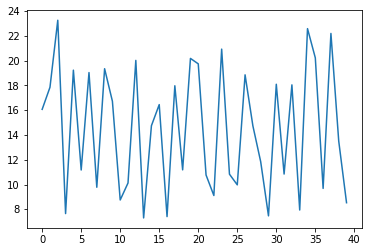

In [76]:
plt.plot(Y_pred)

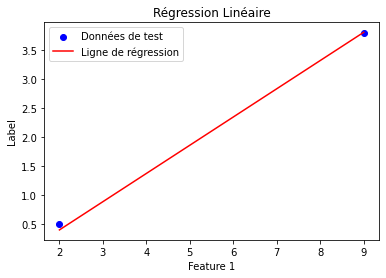

In [98]:
model = LinearRegression()
model.fit(X_train, Y_train)

predictions = model.predict(X_test)

plt.scatter(X_test['feature1'], Y_test, color='blue', label='Données de test')

plt.plot(X_test['feature1'], predictions, color='red', label='Ligne de régression')


plt.xlabel('Feature 1')
plt.ylabel('Label')
plt.title('Régression Linéaire')
plt.legend()
plt.show()

In conclusion, the solution described above is effective at predicting sales using the ad platform’s data sets.